# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

Sprint 2

Author: Patrick Smith

Date: 24/03/2024

Contact: patrick.b.smith@gmail.com

     ~~~             |
~~~~     ~~~~      -----                    |
     ~~~           )___(                  -----
                     |                    )___(
                 ---------                  |
                /         \              -------
               /___________\            /       \
                     |                 /_________\
              ---------------               |
             /               \        -------------
            /                 \      /             \
           /___________________\    /_______________\
         ____________|______________________|__________
          \_                                        _/
            \______________________________________/
     ~~..             ...~~~.           ....~~~...     ..~

## Forward


### Population of the United Kingdom 1971-2021

|                | 1971  | 1981  | 1991  | 2001  | 2011  | 2021  |
|----------------|-------|-------|-------|-------|-------|-------|
| All People     | 52.6M | 53.6M | 54.9M | 57.1M | 63.3M | -M |
| Born Abroad    | 3.2M  | 3.4M  | 3.8M  | 4.9M  | 8.0M  | -M |
| % T            | 4.6%  |  6.2%  | 6.7%  | 8.3% | 12.7%  | % |
| % Δ Decade     | 24.0%  | 7.5%  | 11.8%  | 27.7% | 63.0% | - |



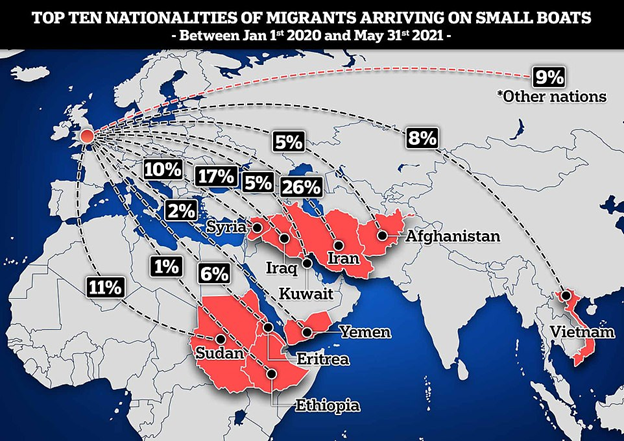






Source: (1): BBC, (2) DailyMail
https://en.wikipedia.org/wiki/Foreign-born_population_of_the_United_Kingdom

## Table of Contents

[Inital Discovery/Problem Solving](#discovery)

[Data Manipulation](#wrangle)

[Initial Description](#Exploratory_Data_Analysis) 

[Discovery and Cleaning](#Discovery)

[Observation 1: Reviewer_Score](#Reviewer_Score)

[Observation 2: Average_Score](#Average_Score)

[Observation x: Case_Outcome](#Case_Outcome)

[Observation x: Decisions and Grants](#Decisions_Grants)

[Observation x: Return Type and Group](#Return_Type)

[Observation x: Applications](#Applications)

[Observation x: Host Country](#Host_Country)

[Observation x: Industry and Jobs](#Industry_Jobs)

[Observation x: Cases and Visas](#Cases)

[Observation x: Initital Conclusion and Forward](#EDA_Forward)

[EDA_Foward](#EDA_Foward)


## Description of Variables


| Column                     | Descriptor                                                                 | Datatype |
|----------------------------|----------------------------------------------------------------------------|----------|
| Year                       | Year of observation.                                                       | int32    |
| Quarter                    | Quarter of observation (Q1=1,Q2=2,Q3=3,Q4=4).                              | object   |
| Nationality                | Nationality of individual.                                                 | object   |
| Region                     | Region of observation.                                                     | object   |
| Return type group          | Type of return.                                                            | object   |
| Return type                | Specific type of return (details not initially provided, adding for consistency). | object   |
| Age                        | Age of individual, outputted in ranges (e.g., 18+).                       | object   |
| Sex                        | Gender of individual with values for male, female, and other/unknown.      | int32    |
| Return destination group   | Destination of return.                                                     | object   |
| Number of returns          | Count of returns.                                                          | float64  |
| Visa type group            | Type of visa the individual is applying to.                                | object   |
| Applicant type             | Type of applicant.                                                         | object   |
| Case outcome               | Outcome of case. This is the dependent variable. (Issued/Rejected/Withdrawal/Resettlement). | object   |
| Decisions                  | Number of decisions made.                                                  | float64  |
| Case type                  | Type of case.                                                              | object   |
| Case outcome group         | Group of case outcome.                                                     | object   |
| UASC                       | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child. Added for consistency. | object   |
| Host Country               | Country of host, similar to Nationality.                                   | object   |
| Application type group     | Type of application grouped.                                               | object   |
| Application type           | Type of application.                                                       | object   |
| Grants                     | Number of grants.                                                          | float64  |
| Location of application    | Location where the application was submitted. Added for completeness.      | object   |
| Applications               | Number of applications.                                                    | float64  |
| Occupation                 | Occupation of individual.                                                  | object   |
| Industry                   | Industry of individual.                                                    | object   |
| Occ. major group           | Major group classification of the occupation. Added for completeness.      | object   |
| Occ. sub-major group       | Sub-major group classification of the occupation. Added for completeness.  | object   |
| Occ. minor group           | Minor group classification of the occupation. Added for completeness.      | object   |
| Occ. unit group            | Unit group classification of the occupation. Added for completeness.       | object   |
| Sex_Male                   | Male dummy set to 1-0.                                                     | object   |
| Sex_Female                 | Female dummy set to 1-0.                                                   | object   |
| Sex_Other                  | Other or NAs dummy set to 1-0.                                             | object   |

# Defaults 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Initial Objective

We are going to complete the following:

1) Read the file
2) Do an initial investigation
3) Clean the data (data wrangling)
4) Do an EDA (exploratory data analysis)
5) Plots and univariate and bivariate distribution
6) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

## Data Wrangling 

<a id = 'wrangle'><a/>

### Merging Pathway:
returns #1 -> entries #2 -> asylum #3-> grants #4 ->  
asylum_applications #5 -> applications_jobs #6  

From oldest read data to new 1-2-3-4-5-6, data is pasted on top, so it is 6-5-4-3-2-1 unfiltered.

Takes like 30 seconds - 1 minute to compute

In [2]:
# Define the directory path
directory_path = r"C:\Users\patri\Downloads\data"

# Define the file names
returns_file_name = "returns-clean.xlsx"
entries_file_name = "entries-clean.xlsx"
asylum_file_name = "asylum-applications-datasets-dec-2023-clean.xlsx"
grants_file_name = "Grants of British citizenship-clean.xlsx"
asylum_applications_file_name = "asylum-applications-clean.xlsx"
grants_jobs_file_name = "grants-occupactions-visas-clean.xlsx"
application_jobs_file_name = "applications-occupactions-visas-clean.xlsx"

# Construct the full file paths
returns_file_path = os.path.join(directory_path, returns_file_name)
entries_file_path = os.path.join(directory_path, entries_file_name)
asylum_file_path = os.path.join(directory_path, asylum_file_name)
grants_file_path = os.path.join(directory_path, grants_file_name)
asylum_applications_file_path = os.path.join(directory_path, asylum_applications_file_name)
grants_jobs_file_path = os.path.join(directory_path, grants_jobs_file_name)
application_jobs_file_path = os.path.join(directory_path, application_jobs_file_name)

# Read files and set df variables per sheet
# Specifying specific columns to ensure it pulls the right columns. Without this the combination df was getting multiples of the same columns.
# Picked most columns, decided to drop the non-important ones once the data is analyzed sufficently. 
df_returns = pd.read_excel(returns_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Return type group', 'Return type', 'Age', 'Sex', 'Return destination group', 'Number of returns'])
df_entries = pd.read_excel(entries_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Applicant type', 'Case outcome', 'Decisions'])
df_asylum = pd.read_excel(asylum_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Case type', 'Case outcome group', 'Case outcome', 'Age', 'Sex', 'Applicant type', 'UASC', 'Host Country', 'Decisions'])
df_grants = pd.read_excel(grants_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Application type group', 'Application type', 'Region', 'Nationality', 'Sex', 'Age', 'Grants'])
df_asylum_applications = pd.read_excel(asylum_applications_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex', 'Applicant type', 'UASC', 'Location of application', 'Applications'])
df_grants_jobs = pd.read_excel(grants_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Grants'])
df_application_jobs = pd.read_excel(application_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Applications'])

# Concatenate the dataframes along the rows axis
#Ignore_index is neccesary as the concatenation appeared to be giving different columns and rows based on combined indexes 
df_combined = pd.concat([df_returns, df_entries, df_asylum, df_grants, df_asylum_applications, df_grants_jobs, df_application_jobs], ignore_index=True)

# Sort the dataframe by 'Year' and 'Quarter'
# Almost all these values were populated in all the sheets so useful matching indicators
df_combined.sort_values(by=['Year', 'Quarter'], inplace=True)

# Display the resulting DataFrame
df_combined

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
584636,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584637,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584638,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584639,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584640,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inital Discovery and Cleaning

Let's check how much missing values we have in the data:


In [3]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074297 entries, 584636 to 832886
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1072913 non-null  object 
 1   Quarter                   1072906 non-null  object 
 2   Nationality               1072906 non-null  object 
 3   Region                    1072906 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       546107 non-null   object 
 7   Sex                       554078 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            530863 non-null   object 
 12  Case outcome              461287 non-null   object 
 13  Decisions                 46

In [4]:
print(f"We have {df_combined.shape[0]} rows and {df_combined.shape[1]} columns with  string, floats and integers in our clean data.")

We have 1074297 rows and 29 columns with  string, floats and integers in our clean data.


Let's check for null or missing values. 
- Looks like Year, Quarter, Nationality, and Region are most populated and the least of our worries.
- The numerical data includes floats and integers.

Let's look at nulls. We know that there are nulls in all the columns, so we will now investigate how many nulls .

In [5]:
# displaying sum of na per collumn
df_combined.isna().sum(axis=0)

Year                           1384
Quarter                        1391
Nationality                    1391
Region                         1391
Return type group            836657
Return type                  836657
Age                          528190
Sex                          520219
Return destination group     836657
Number of returns            836657
Visa type group              727303
Applicant type               543434
Case outcome                 613010
Decisions                    613010
Case type                    960004
Case outcome group           960004
UASC                         890428
Host Country                 960004
Application type group       941724
Application type             949699
Grants                       857280
Location of application     1004721
Applications                 917335
Occupation                   902467
Industry                     902467
Occ. major group             902467
Occ. sub-major group         902467
Occ. minor group            

First we can tackle quarter, nationality, and region because they have the same number of null sums, and year should be simple as well.

Let's check percentage of NA of shape of the whole df.

In [6]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.128828
Quarter                      0.129480
Nationality                  0.129480
Region                       0.129480
Return type group           77.879488
Return type                 77.879488
Age                         49.166106
Sex                         48.424132
Return destination group    77.879488
Number of returns           77.879488
Visa type group             67.700366
Applicant type              50.585080
Case outcome                57.061502
Decisions                   57.061502
Case type                   89.361136
Case outcome group          89.361136
UASC                        82.884714
Host Country                89.361136
Application type group      87.659558
Application type            88.401904
Grants                      79.799162
Location of application     93.523579
Applications                85.389329
Occupation                  84.005354
Industry                    84.005354
Occ. major group            84.005354
Occ. sub-maj

We can initially see that:

- The columns of 2nd priorty are: `Age`, `Sex`, and `Applicant type` because they have the lowest percentage of nulls, around 48-51%
- 3rd priority are: `Case outcome` and `Decisions`
- After we can look at the others and figure out if any could be combined or dropped
- It is likely that `Occupation`, `Industry`, and the 4 `Occ` columns could be, in some combination, combined, or dropped

First, let's check if there are any duplicates.

In [7]:
df_combined.duplicated().sum(axis=0)

45861

Displaying nulls

In [8]:
df_combined[df_combined['Year'].isnull()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
831503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like there are a lot of rows we can drop that have no data. Maybe leftovers rows from the csvs that were combined

We can delete 1384 rows because they only have NaNs and no info

In [9]:
# Drop rows where either 'Year' or 'Quarter' column has na
df_combined.dropna(subset=['Year', 'Quarter'], inplace=True)

In [10]:
df_combined.shape

(1072906, 29)

OK we dropped 1384 rows
Let's check if there are any duplicates

In [11]:
df_combined[df_combined.duplicated()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
237659,2005,2005 Q1,Afghanistan,Asia Central,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237683,2005,2005 Q1,Albania,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237727,2005,2005 Q1,Algeria,Africa North,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237730,2005,2005 Q1,Angola,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237795,2005,2005 Q1,Australia,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829067,2022,2022 Q4,Stateless,Other,NaN,NaN,NaN,F,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829069,2022,2022 Q4,Nigeria,Africa Sub-Saharan,NaN,NaN,NaN,M,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829070,2022,2022 Q4,Jamaica,America Central and South,NaN,NaN,NaN,F,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829072,2022,2022 Q4,Italy,EU 14,NaN,NaN,NaN,F,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print (f"there are {df_combined.duplicated().sum()} duplicates in the dataset")

there are 44473 duplicates in the dataset


Ok we have a lot. We can drop these

In [13]:
df_combined = df_combined.drop_duplicates()

Check if there's no duplicates

In [14]:
df_combined[df_combined.duplicated()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group


OK we're good. Let's check for nas now, as a percentage

In [15]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.895043
Return type                 76.895043
Age                         46.902034
Sex                         46.140779
Return destination group    76.895043
Number of returns           76.895043
Visa type group             70.034898
Applicant type              52.157214
Case outcome                58.921874
Decisions                   58.921874
Case type                   88.886977
Case outcome group          88.886977
UASC                        82.122316
Host Country                88.886977
Application type group      87.123031
Application type            87.884675
Grants                      79.172100
Location of application     93.235340
Applications                85.010983
Occupation                  83.824712
Industry                    83.824712
Occ. major group            83.824712
Occ. sub-maj

Yes we have a lot

Let's look at quarter now. It's a year and a letter (Q), so let's map this into 1, 2, 3, 4

In [16]:
df_combined['Quarter'].value_counts()

Quarter
2023 Q3    31634
2022 Q3    31096
2023 Q2    29371
2022 Q4    29344
2023 Q1    29019
           ...  
2003 Q3     1017
2001 Q1      868
2001 Q2      783
2001 Q3      774
2001 Q4      762
Name: count, Length: 92, dtype: int64

OK lets split the 'Quarter' column into 'Year' and 'Quarter' into different parts

We're goign to map the 4 quarters 'Quarter' to 1, 2, 3 and 4

In [17]:
df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)

quarter_mapping = {'1': 1, '2': 2, '3': 3, '4': 4}

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\3883465202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)


OK let's see if it worked

In [18]:
df_combined.sample(3)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
810190,2019,2,Russia,Europe Other,NaN,NaN,30-49,Female,NaN,NaN,...,Naturalisation based on residence,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536205,2021,3,Pakistan,Asia South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105458,2012,2,France,EU 14,Refused entry at port and subsequently departed,Departed from UK Ports,30 to 49,Male,Home country,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OK lets look at nationality and region now.

In [19]:
df_combined['Nationality'].value_counts()

Nationality
India                                                     34750
Pakistan                                                  25671
United States                                             23394
Nigeria                                                   22393
China                                                     21134
                                                          ...  
St Pierre and Miquelon (French)                               1
Svalbard and Jan Mayen Islands (Norwegian)                    1
Tokelau (New Zealand)                                         1
New Caledonia (French)                                        1
South Georgia and the South Sandwich Islands (British)        1
Name: count, Length: 239, dtype: int64

Checking for uniques

In [20]:
df_combined['Nationality'].nunique()

239

This is fine for now. Perhaps we could combine smaller countries together or drop the smaller ones later.

Let's look at region

In [21]:
df_combined['Region'].value_counts()

Region
Africa Sub-Saharan           225958
America Central and South    114791
Europe Other                 103891
Asia South                   102096
Middle East                   94013
EU 14                         65244
Asia South East               63348
Asia East                     57450
Africa North                  52974
America North                 35842
Asia Central                  29130
Oceania                       24129
EU 8                          23290
Other                         17943
EU 2                          11884
EU Other                       6449
Other and unknown                 1
Name: count, dtype: int64

All these have value other than 'other', which could mean anything. However, we will just leave for now and compress to more general regions, like Africa, Central & South America, Europe, Asia, Africa, Oceana, and Other

In [22]:
# Define the mapping from specific regions to general regions
region_mapping = {
    'Africa Sub-Saharan': 'Africa',
    'America Central and South': 'America',
    'Europe Other': 'Europe',
    'Asia South': 'Asia',
    'Middle East': 'Middle East',
    'EU 14': 'Europe',
    'Asia South East': 'Asia',
    'Asia East': 'Asia',
    'Africa North': 'Africa',
    'America North': 'America',
    'Asia Central': 'Asia',
    'Oceania': 'Oceania',
    'EU 8': 'Europe',
    'Other': 'Other',
    'EU 2': 'Europe',
    'EU Other': 'Europe'
}

Apply the mapping to the 'Region' column

In [23]:
df_combined['General_Region'] = df_combined['Region'].map(region_mapping)

# Displaying new general region coolumn
print(df_combined['General_Region'].value_counts())


General_Region
Africa         278932
Asia           252024
Europe         210758
America        150633
Middle East     94013
Oceania         24129
Other           17943
Name: count, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_13804\3504436953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['General_Region'] = df_combined['Region'].map(region_mapping)


Check the new distribution of general regions

In [24]:
df_combined['General_Region'].value_counts()

General_Region
Africa         278932
Asia           252024
Europe         210758
America        150633
Middle East     94013
Oceania         24129
Other           17943
Name: count, dtype: int64

Let's check 'Sex' now

In [25]:
df_combined['Sex'].value_counts()

Sex
Male                                 279553
Female                               236311
Total (pre-2009)                      30604
Unknown                                5242
Unknown Sex                            1015
M                                       574
F                                       572
Unknown / Not Given                      24
U                                         7
Data Unavailable in Source System         2
Male                                      2
Name: count, dtype: int64

- OK we are going to set the categories to lower case
- Strip whitespace is to remove leading and ending spaces
- Then replace variations with standard terms using loc

REF: https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string

In [26]:
df_combined.loc[:, 'Sex'] = df_combined['Sex'].str.lower().str.strip()
df_combined.loc[:, 'Sex'] = df_combined['Sex'].replace({
    'm': 'male',
    'f': 'female',
    'total (pre-2009)': 'unknown',
    'unknown sex': 'unknown',
    'u': 'unknown',
    'unknown / not given': 'unknown',
    'data unavailable in source system': 'unknown'
})

Let's map it to male and female 1 and 2, and make 3 unknown. Filling unknowns as 3 as well

In [27]:
# Define the mapping dictionary
sex_mapping = {
    'male': 1,
    'female': 2,
    'unknown': 3
}
df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)
df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2285278314.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)
C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2285278314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)


Let's see if it worked

In [28]:
df_combined['Sex'].value_counts()

Sex
3    511421
1    280129
2    236883
Name: count, dtype: int64

All good. Looks about to be ~50% unknowns. Let's check the distribution

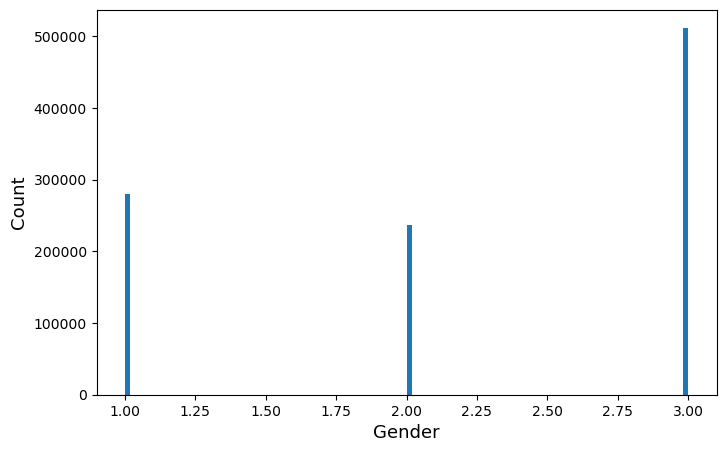

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Sex'], bins = 100 )
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

Alright, let's check Age now

In [30]:
df_combined['Age'].value_counts()

Age
30 to 49            89101
30-49               87665
18 to 29            81653
18-29               78242
Under 18            60547
50-69               39682
50 to 69            34098
Total (pre-2009)    30604
17 and under        26160
70+                 11452
70 and over          6092
Unknown               695
Unknown Age            61
under 18               25
Name: count, dtype: int64

OK let's run a loop so we can consolidate age into difference ranges, we'll define it as standarize_age

In [31]:
def standardize_age(age):
    if age in ["Under 18", "17 and under"]:
        return "Under 18"
    elif age in ["18 to 29", "18-29"]:
        return "18 to 29"
    elif age in ["30 to 49", "30-49"]:
        return "30 to 49"
    elif age in ["50 to 69", "50-69"]:
        return "50 to 69"
    elif age in ["70+", "70 and over"]:
        return "70+"
    elif age in ["Unknown", "Unknown Age", "Total (pre-2009)"]:
        return "Unknown"
    else:
        return "Unknown"  # Default case if the age doesn't match

# Apply the function to the 'Age' column
df_combined['Age'] = df_combined['Age'].apply(standardize_age)


C:\Users\patri\AppData\Local\Temp\ipykernel_13804\1066886648.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Age'] = df_combined['Age'].apply(standardize_age)


Checking

In [32]:
df_combined['Age'].value_counts()

Age
Unknown     513741
30 to 49    176766
18 to 29    159895
Under 18     86707
50 to 69     73780
70+          17544
Name: count, dtype: int64

OK let's check distribution for age now

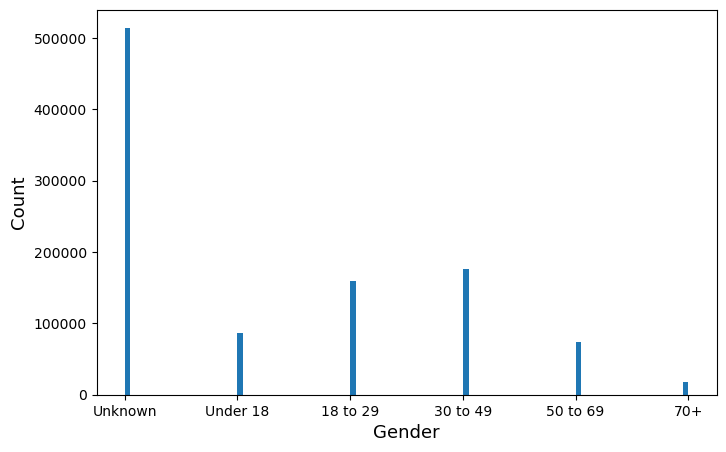

In [33]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Age'], bins = 100 )
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

Looks to follow a normal distribution

We can further refine it later.

Now let's look at case outcome, one of our main dependent variables.

<div id='Case_Outcome'></div>

### Notable Observation: Case Outcome

In [34]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                                                                           174922
Refused                                                                           91014
Withdrawn                                                                         34256
Other Refusals                                                                    32983
Refugee Permission                                                                22699
Certified Refusal                                                                  9924
Explicit withdrawal                                                                9510
Lapsed                                                                             7979
Implicit withdrawal                                                                6579
3rd Country Refusal                                                                5752
Discretionary Leave                                                                5086
Total (pre-2010)   

OK have a lot of different categories, we need to map them together and consolidate it so we can make better sense of the data

In [35]:
outcome_mapping = {
    'Issued': [
        'Issued', 
        'Humanitarian Protection', 
        'Discretionary Leave',
        'Exceptional Leave to Remain',
        'UASC Leave',
        'Calais Leave'
    ],
    'Refused': [
        'Refused', 
        'Certified Refusal', 
        '3rd Country Refusal', 
        'Non-Compliance Refusal',
        'Other Refusals',
        'Other refusals'  
    ],
    'Withdrawn': [
        'Withdrawn', 
        'Lapsed', 
        'Explicit withdrawal', 
        'Implicit withdrawal',
        'Other Withdrawal',
        'Other withdrawal' 
    ],
    'Resettlements': [
        'Resettlement - Gateway Protection Programme',
        'Resettlement - UK Resettlement Scheme',
        'Resettlement - Vulnerable Children Resettlement Scheme',
        'Resettlement - Vulnerable Persons Resettlement Scheme',
        'Resettlement - Community Sponsorship Scheme',
        'Resettlement - Mandate Scheme',
        'Resettlement - ACRS Pathway 1 - Settled accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation',
        'Resettlement - ACRS Pathway 3 - Settled accommodation',
        'Relocation - ARAP - Settled accommodation',
        'Resettlement - ACRS Pathway 1 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Interim accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Settled accommodation',
        'Relocation - ARAP - Interim accommodation',
        'Relocation - ARAP - Transitional accommodation',
        'Resettlement - ACRS Pathway 1 - Accommodation not recorded',
        'Resettlement - ACRS Pathway 1 - Interim accommodation',
        'Relocation - ARAP - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Transitional accommodation',
        'Resettlement - ACRS Pathway 3 - Accommodation not recorded'
    ],
    'Temporary Protection': [
        'Temporary Refugee Permission',
        'Refugee Permission'
    ],
    'Other Grants': [
        'Other Grants'  # Based on context, might need to reassess or find a more suitable main category
    ],
    'Total (pre-2010)': [
        'Total (pre-2010)'
    ]
}



OK now, we want:

outcome_mapping = {
    'Issued': ['Issued', 'Humanitarian Protection'],
    'Refused': ['Refused', 'Certified Refusal']
}


To look like in a broader category:

inverted_mapping = {
    'Issued': 'Issued',
    'Humanitarian Protection': 'Issued',
    'Refused': 'Refused',
    'Certified Refusal': 'Refused'
}

Then we can map it.


First we create an empty dictionary, then we loop for case_outcome in the outcome_mapping applied above within the list

Applying this mapping to to 'Case outcome'

In [36]:
inverted_mapping = {}

for case_cat, case_outcomes in outcome_mapping.items():
    # For each specific outcome in the list...
    for specific_outcome in case_outcomes:
        inverted_mapping[specific_outcome] = case_cat

#REF: https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping?page=2&tab=scoredesc

In [37]:
df_combined['Case outcome'] = df_combined['Case outcome'].map(inverted_mapping).fillna(df_combined['Case outcome'])

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2686088770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Case outcome'] = df_combined['Case outcome'].map(inverted_mapping).fillna(df_combined['Case outcome'])


OK checking if it worked

In [38]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                  184409
Refused                 144359
Withdrawn                60111
Temporary Protection     22775
Resettlements             3958
Total (pre-2010)          3928
Other Grants              2921
Name: count, dtype: int64

Minor mapping adjustmenet: going to move 'Total (pre-2010)' to 'Issued' using .replace

In [39]:
df_combined['Case outcome'] = df_combined['Case outcome'].replace('Total (pre-2010)', 'Issued')

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2784780062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Case outcome'] = df_combined['Case outcome'].replace('Total (pre-2010)', 'Issued')


Check

In [40]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                  188337
Refused                 144359
Withdrawn                60111
Temporary Protection     22775
Resettlements             3958
Other Grants              2921
Name: count, dtype: int64

OK let's plot this to see the distribution

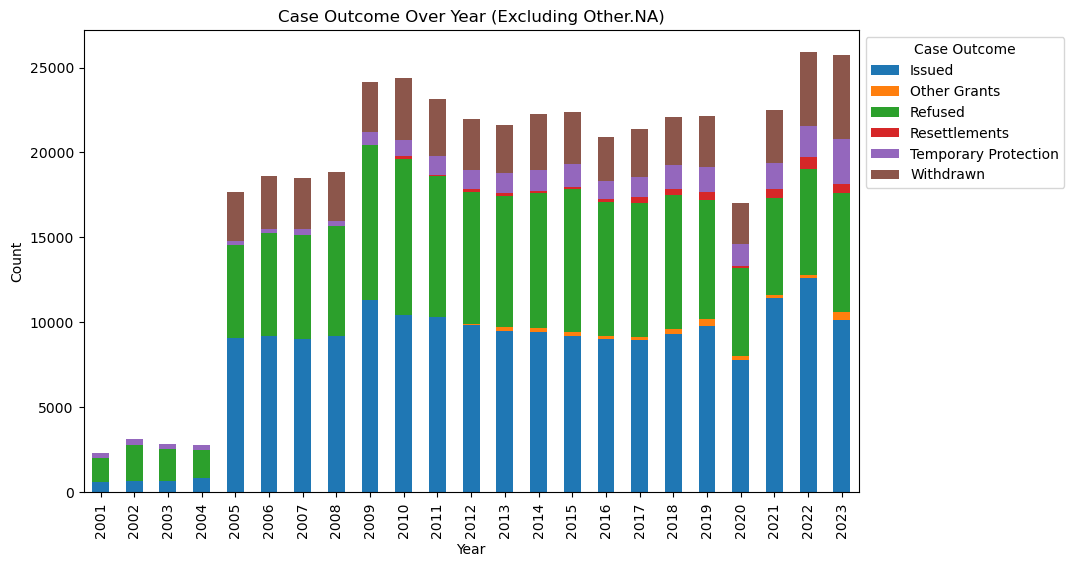

In [41]:
import matplotlib.pyplot as plt

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
#filtered_df = df_combined[df_combined['Case outcome'] != 'Unknown']

# Group filtered data by 'Year' and 'Case outcome'
outcome_counts = df_combined.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Ploting the data
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Case Outcome Over Year (Excluding Other.NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()


Looks good but let's normalize it to see improved so the information is made consistent and errors are removed

Through a similar format so that it's easier to interpret and use

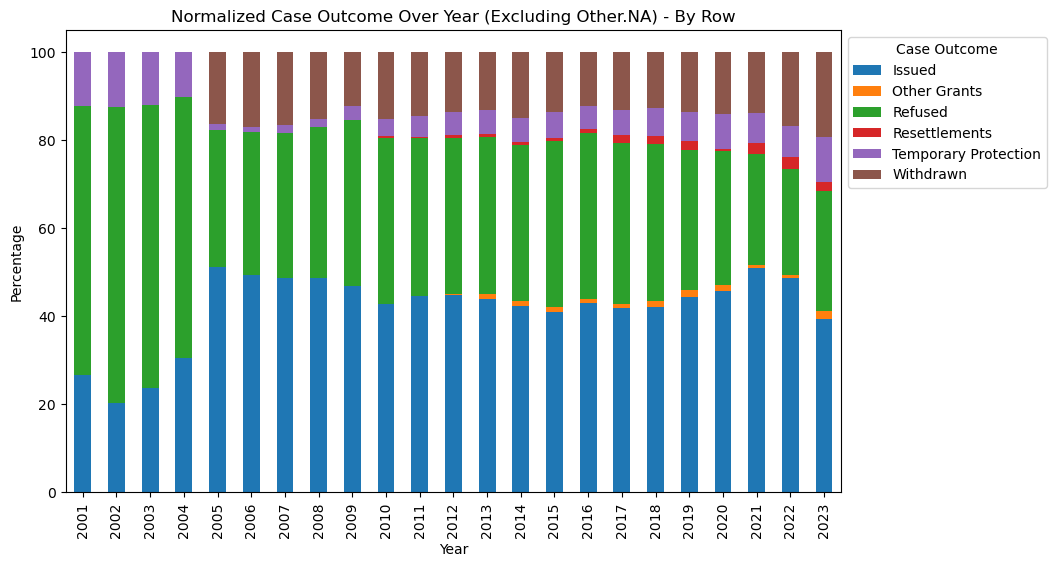

In [42]:
import matplotlib.pyplot as plt

outcome_counts = df_combined.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Normalize by row (percentage of each year's total)
outcome_counts_norm_row = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Normalize by column (percentage of each case outcome's total)
outcome_counts_norm_col = outcome_counts.div(outcome_counts.sum(axis=0), axis=1) * 100

# Ploting
outcome_counts_norm_row.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Case Outcome Over Year (Excluding Other.NA) - By Row')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

We can see that there was a jump in immigration across the board in 2004 and 2005, and this was due to an election which meaningfully changed policies


REF: https://www.encyclopedia.com/humanities/applied-and-social-sciences-magazines/uk-immigration-and-2005-general-election

Let's look at 'Case outcome group'

In [43]:
df_combined['Case outcome group'].value_counts()

Case outcome group
Refused                 53345
Grant of Protection     29688
Withdrawn               21804
Grant of Other Leave     9453
Name: count, dtype: int64

Let's look at the relationship of 'Nationality' and 'Case outcome'

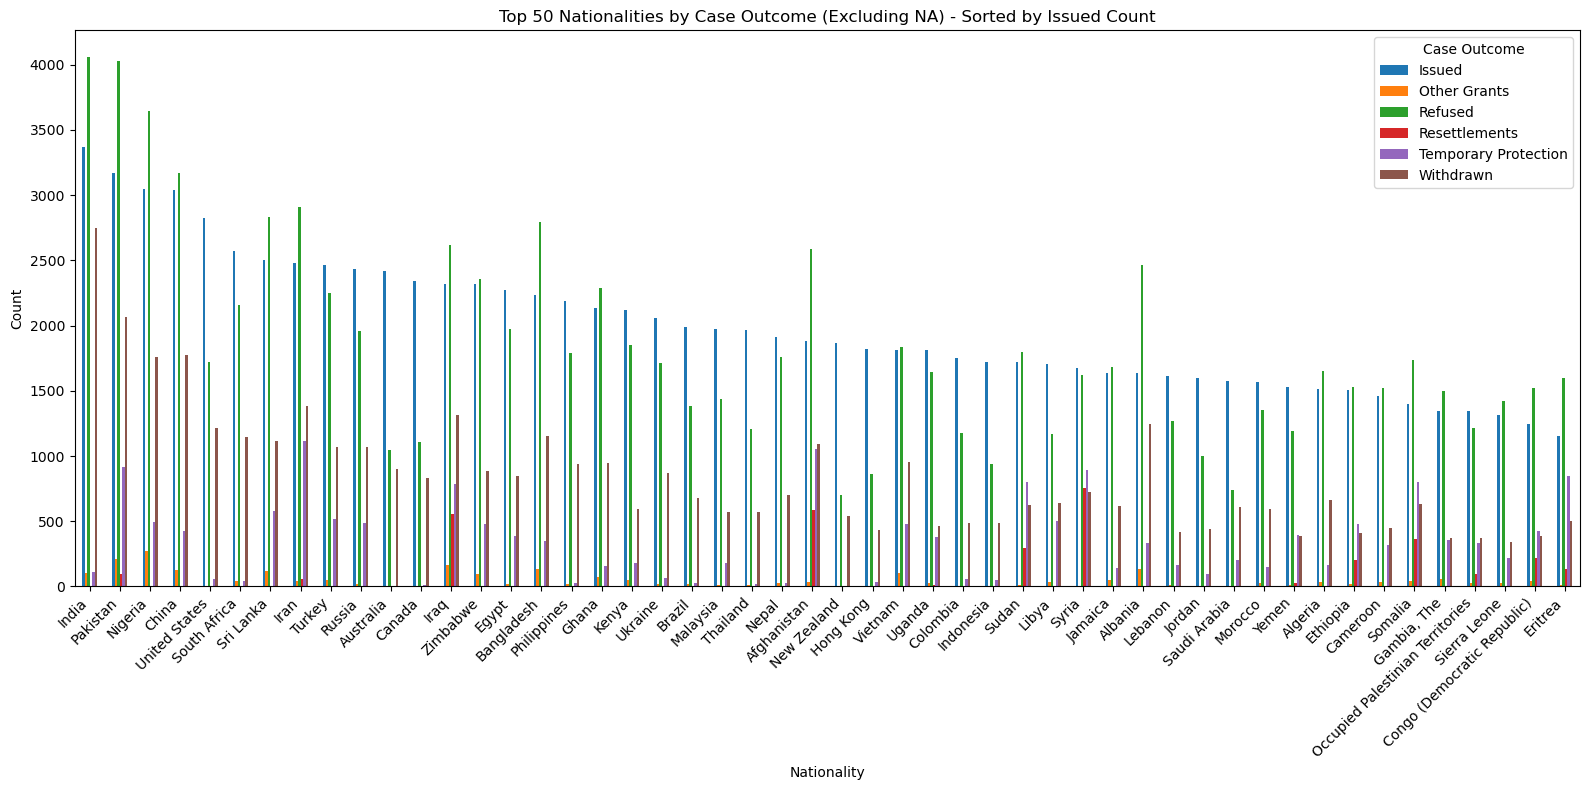

In [44]:
grouped_counts = df_combined.groupby(['Nationality', 'Case outcome']).size().unstack(fill_value=0)

# Get the top 50 nationalities by total count across all case outcomes
top_50_nationalities = grouped_counts.sum(axis=1).nlargest(50).index

# Filter the grouped counts dataframe to include only the top 50 nationalities
grouped_counts_top_50 = grouped_counts.loc[top_50_nationalities]

# Sort the data by the "Issued" count in descending order
grouped_counts_top_50_sorted = grouped_counts_top_50.sort_values(by='Issued', ascending=False)

# Plot the sorted data
grouped_counts_top_50_sorted.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Top 50 Nationalities by Case Outcome (Excluding NA) - Sorted by Issued Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

A bit noisy but we can notice that certain countries that are autocratic have higher levels of refused or resettlements. Let's look at Iraq as an example

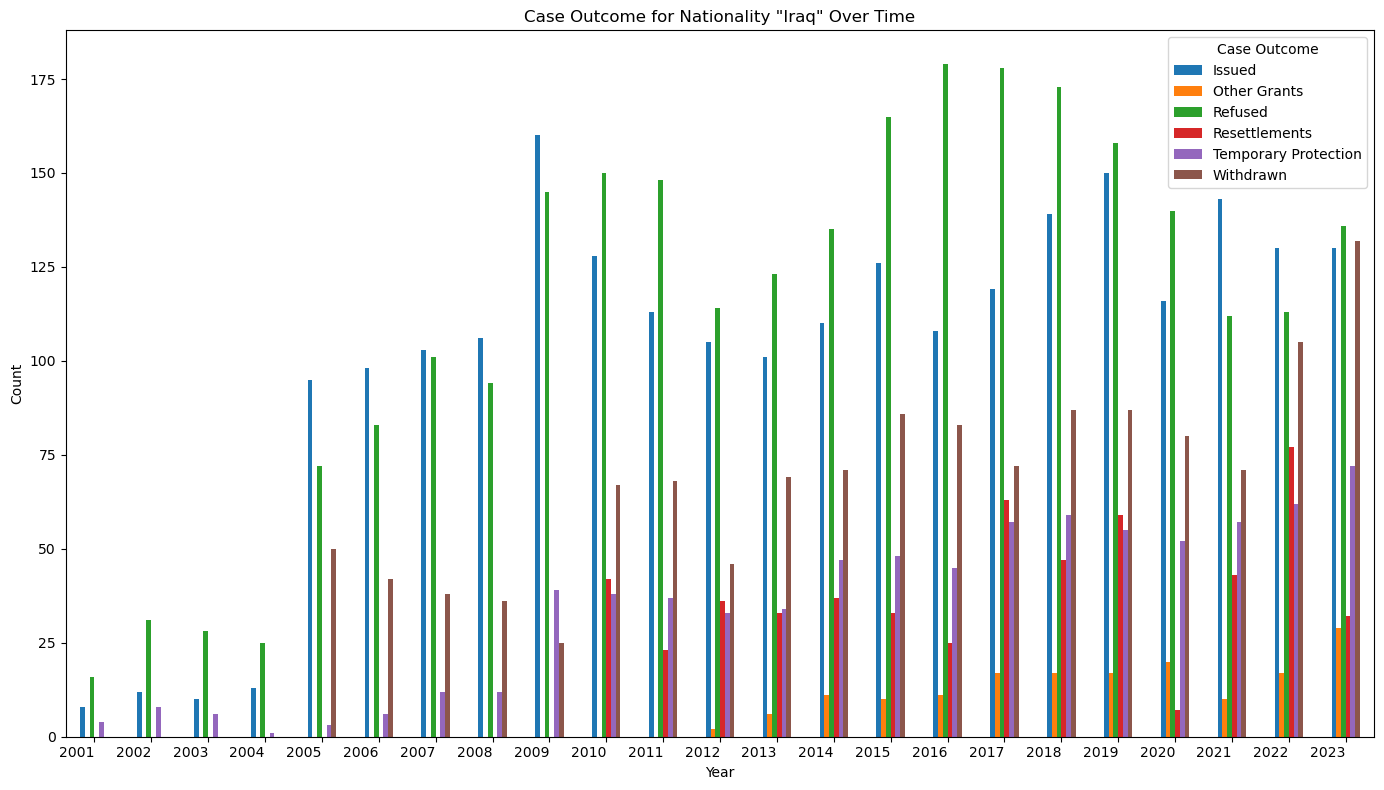

In [45]:
filtered_df_iraq = df_combined[(df_combined['Nationality'] == 'Iraq') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_iraq = filtered_df_iraq.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_iraq.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Iraq" Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

OK we can see that each country tells a different story. For Iraq, there was a war between 2003-2011. US troops offically withdrew in 2011

REF: https://en.wikipedia.org/wiki/Iraq_War

Let's look at Syria as well

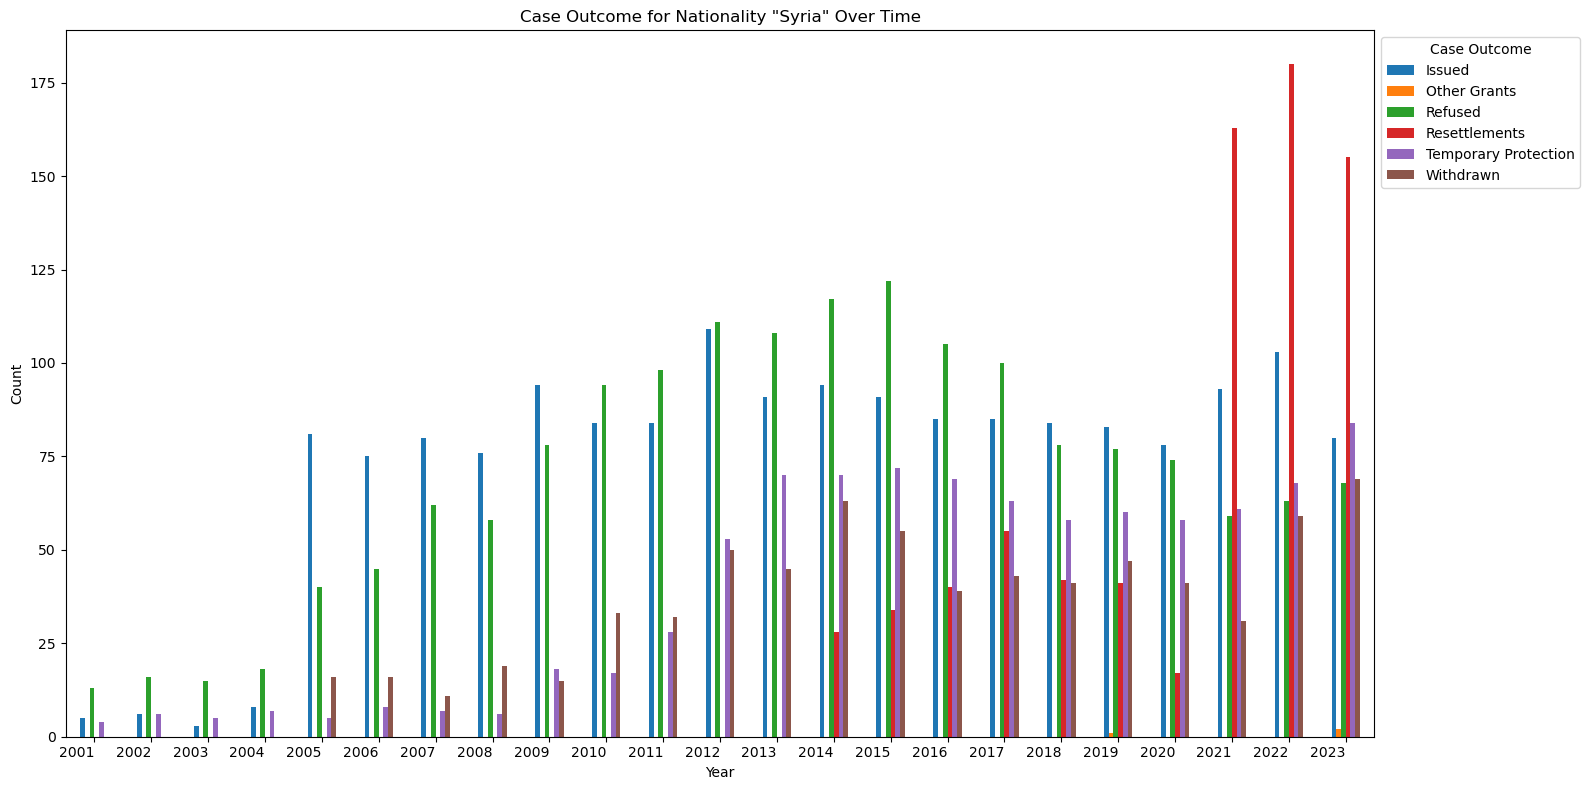

In [46]:
filtered_df_syria = df_combined[(df_combined['Nationality'] == 'Syria') & (df_combined['Case outcome'] != 'Other.NA')]
grouped_counts_syria = filtered_df_syria.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_syria.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Syria" Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

With this we can see that resettlements really picked up in 2024, with a significant increase in 2021-2023

Again, the conflict began a few years prior to the numbers jumping up

In March 2011, popular discontent with the rule of Bashar al-Assad triggered large-scale protests and pro-democracy rallies across Syria, as part of the wider Arab Spring protests in the region. After months of crackdown by governments security apparatus, various armed rebel groups such as the Free Syrian Army began forming across the country, marking the beginning of the Syrian insurgency. By mid-2012, the crisis had escalated into a full-blown civil war.

Receiving arms from NATO and GCC states, rebel forces initially made significant advances against the government forces, who were receiving arms from Iran and Russia. Rebels captured the regional capitals of Raqqa in 2013 and Idlib in 2015. Consequently, in September 2015, Russia launched a military intervention in support of the government, shifting the balance of the conflict. By late 2018, all rebel strongholds, except parts of Idlib region, had fallen to the government forces. 

REF: https://en.wikipedia.org/wiki/Syrian_civil_war

OK let's continue to look at top 50 nationalies and their shapes, and let's see if we can come up with a ratio

In [47]:
# Step 1: Filter the dataframe to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index

# Adjusted Step 2: Includes counts for new categories
rejection_data = []
for nationality in top_50_nationalities:
    nationality_data = df_combined[df_combined['Nationality'] == nationality]
    refused_count = nationality_data[nationality_data['Case outcome'] == 'Refused'].shape[0]
    withdrawn_count = nationality_data[nationality_data['Case outcome'] == 'Withdrawn'].shape[0]
    issued_count = nationality_data[nationality_data['Case outcome'] == 'Issued'].shape[0]
    refugee_permission_count = nationality_data[nationality_data['Case outcome'] == 'Refugee Permission'].shape[0]
    temporary_protection_count = nationality_data[nationality_data['Case outcome'] == 'Temporary Protection'].shape[0]
    resettlements_count = nationality_data[nationality_data['Case outcome'] == 'Resettlements'].shape[0]
    other_grants_count = nationality_data[nationality_data['Case outcome'] == 'Other Grants'].shape[0]

    # Adjusted Step 3: Calculate total - issued, refugee permission, temporary protection, resettlements, and other grants
    total_positive_outcomes = issued_count + refugee_permission_count + temporary_protection_count + resettlements_count + other_grants_count

    # Step 4: Remains the same - Calculates total - total refused + withdrawn
    total_refused_withdrawn = refused_count + withdrawn_count
    
    # Adjusted Step 5: Calculate the rejection ratio based on new total
    if total_positive_outcomes > 0:  # Prevent division by zero
        rejection_ratio = round((refused_count / total_positive_outcomes), 2)
    else:
        rejection_ratio = 0

    # Adjusted Step 6: Calculate the total rejection ratio (including withdrawals) based on new total
    if total_positive_outcomes > 0:  # Prevent division by zero
        total_rejection_ratio = round((total_refused_withdrawn / total_positive_outcomes), 2)
    else:
        total_rejection_ratio = 0
    
    # Step 7: Append the adjusted data to the list
    rejection_data.append((nationality, refused_count, withdrawn_count, issued_count, refugee_permission_count, temporary_protection_count, resettlements_count, other_grants_count, total_positive_outcomes, rejection_ratio, total_rejection_ratio))

# Adjusted columns to display the new outcomes
rejection_df = pd.DataFrame(rejection_data, columns=['Nationality', 'Refused', 'Withdrawn', 'Issued', 'Refugee Permission', 'Temporary Protection', 'Resettlements', 'Other Grants', 'Total Positive Outcomes', 'Rejection Ratio', 'Total Rejection Ratio'])
print(rejection_df)


#REF: Chatgpt

                    Nationality  Refused  Withdrawn  Issued  \
0                         India     4061       2748    3366   
1                      Pakistan     4032       2064    3172   
2                 United States     1719       1217    2828   
3                       Nigeria     3643       1756    3044   
4                         China     3172       1777    3041   
5                  South Africa     2159       1149    2575   
6                        Turkey     2248       1068    2462   
7                          Iran     2908       1383    2484   
8                     Sri Lanka     2832       1119    2503   
9                        Brazil     1384        677    1986   
10                       Russia     1956       1073    2433   
11                   Bangladesh     2793       1156    2238   
12                         Iraq     2619       1315    2323   
13                  Philippines     1787        940    2186   
14                  Afghanistan     2587       1089    

OK let's plot this for rejection ration (issued+refugee permission)

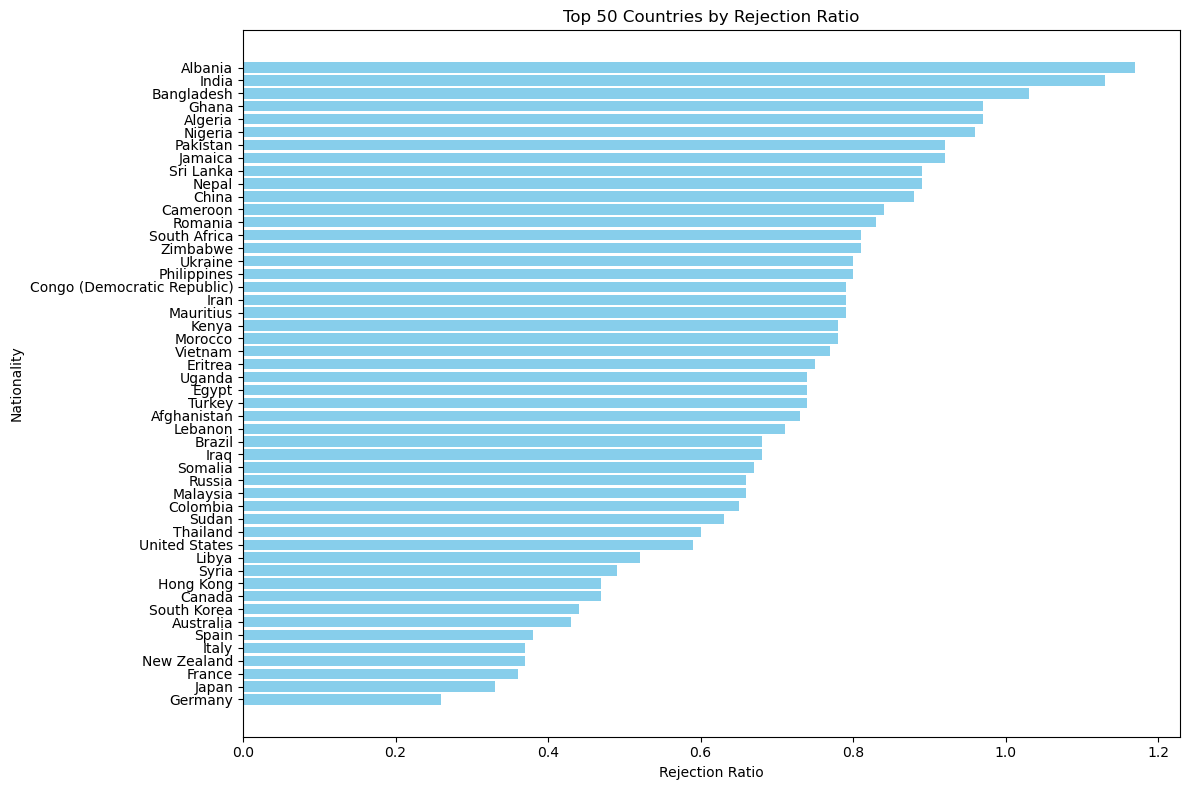

In [48]:
rejection_df_sorted = rejection_df.sort_values(by='Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Rejection Ratio'], color='skyblue')
plt.xlabel('Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Rejection Ratio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


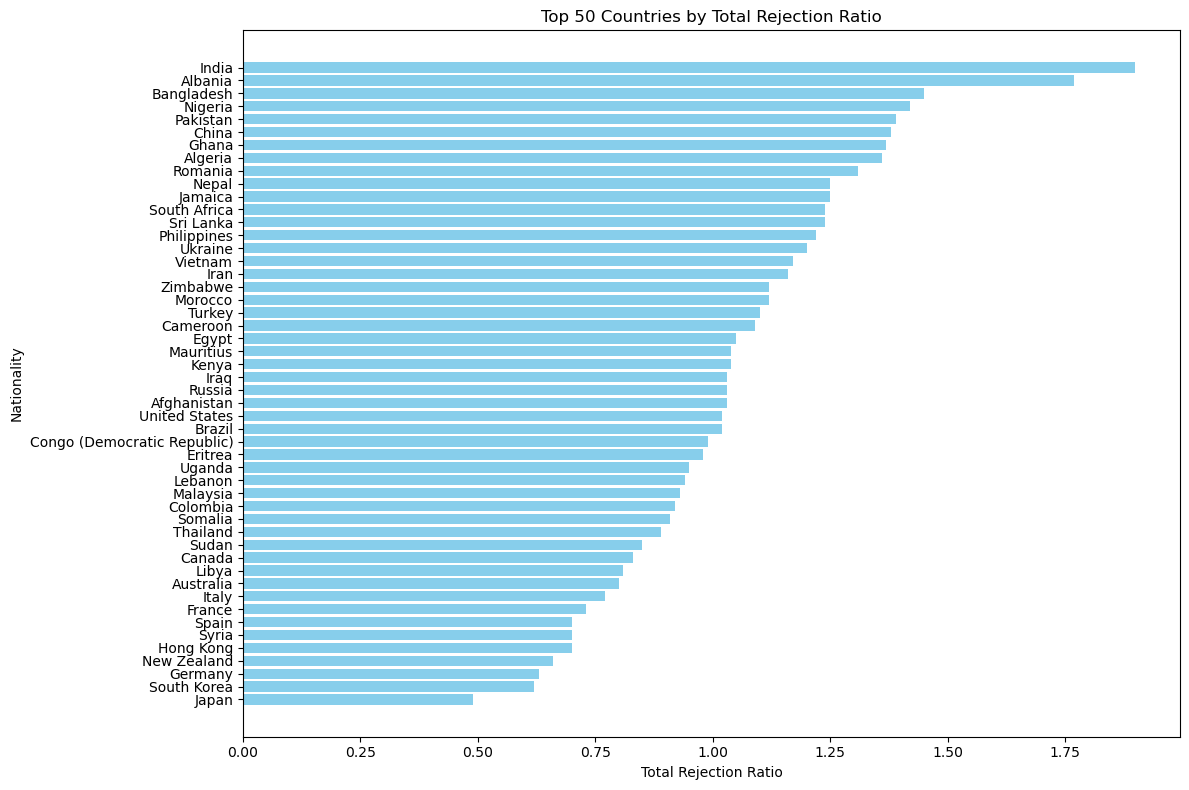

In [49]:
# Sort the rejection data by total rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Total Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Total Rejection Ratio'], color='skyblue')
plt.xlabel('Total Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Total Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest total rejection ratio at the top
plt.tight_layout()
plt.show()


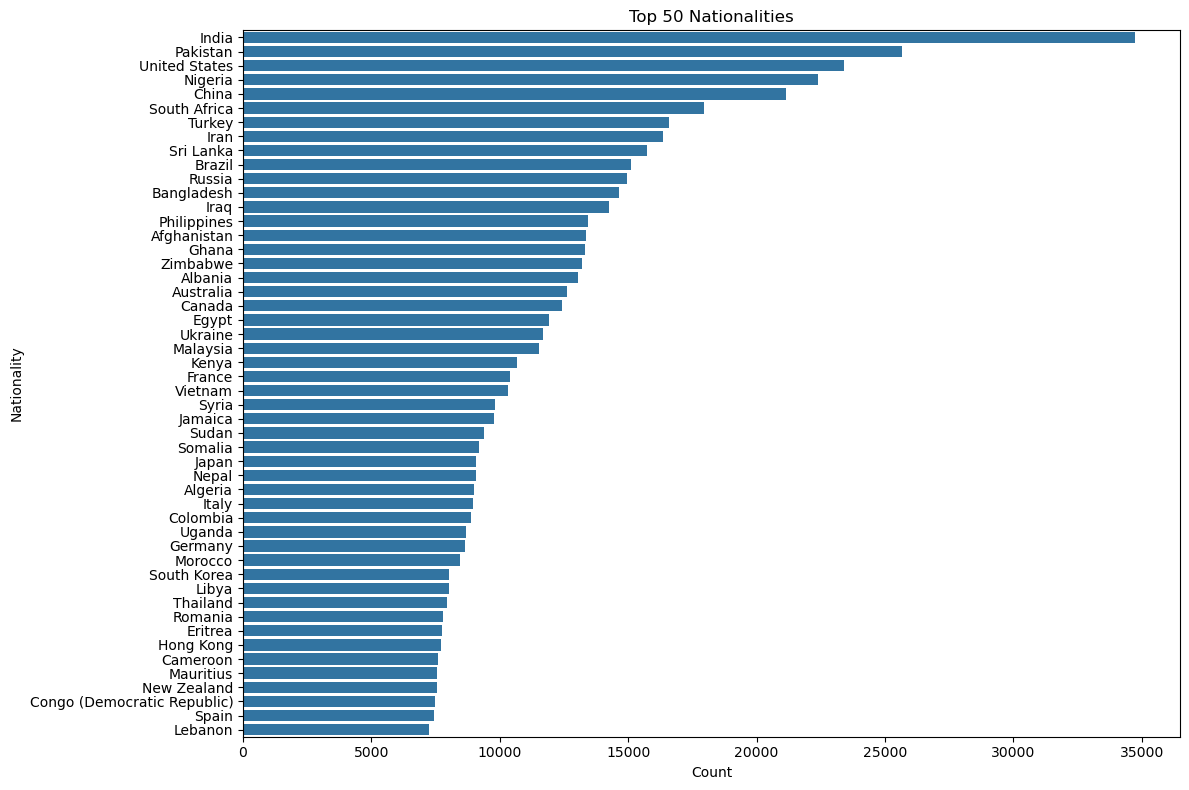

In [50]:
import seaborn as sns

# Filter the DataFrame to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index
filtered_df = df_combined[df_combined['Nationality'].isin(top_50_nationalities)]

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot for the top 50 nationalities
# Since we're focusing on 'Nationality' only, there's no need for 'hue'
sns.countplot(y='Nationality', data=filtered_df, order=filtered_df['Nationality'].value_counts().index)

# Set the title and labels
plt.title('Top 50 Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')

# Rotate the y-axis labels for better readability if necessary
# plt.xticks(rotation=45) # This is for the x-axis labels, might not be needed

# Show the plot
plt.tight_layout()
plt.show()


<div id='Decisions_Grants'></div>

### Observation x: Decisions and Grants

Let's look at 'Decisions' and 'Grants.' Starting with 'Decisions'

In [51]:
df_combined['Decisions'].value_counts()

Decisions
1.0       130965
2.0        55552
3.0        33019
4.0        22610
5.0        16364
           ...  
2045.0         1
4420.0         1
2509.0         1
1421.0         1
4915.0         1
Name: count, Length: 4842, dtype: int64

Let's look at the distribution. We need to log the y scale to make sense out of the data

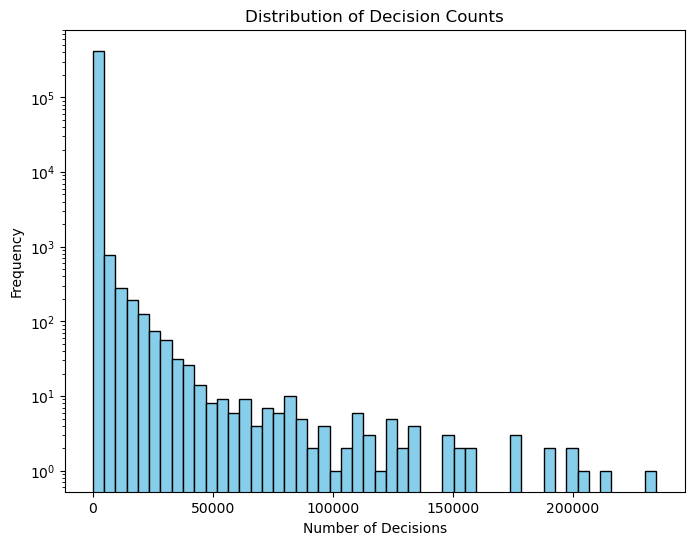

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['Decisions'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Decisions')
plt.ylabel('Frequency')
plt.title('Distribution of Decision Counts')
plt.yscale('log') 
plt.show()

Let's fill 'Decisions' nas with 0s if there is no data. We can decide to interate later if neccesary

In [53]:
df_combined['Decisions'] = pd.to_numeric(df_combined['Decisions'], errors='coerce').fillna(0)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\1304701884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Decisions'] = pd.to_numeric(df_combined['Decisions'], errors='coerce').fillna(0)


Check

In [54]:
df_combined['Decisions'].value_counts()

Decisions
0.0       605972
1.0       130965
2.0        55552
3.0        33019
4.0        22610
           ...  
2045.0         1
4420.0         1
2509.0         1
1421.0         1
4915.0         1
Name: count, Length: 4843, dtype: int64

Looking for 'Grants' now. Same logic

In [55]:
df_combined['Grants'].value_counts()

Grants
1.0       90672
2.0       28543
3.0       15237
4.0       10008
5.0        7453
          ...  
662.0         1
926.0         1
1954.0        1
1330.0        1
554.0         1
Name: count, Length: 1039, dtype: int64

Looking at distribution, logged

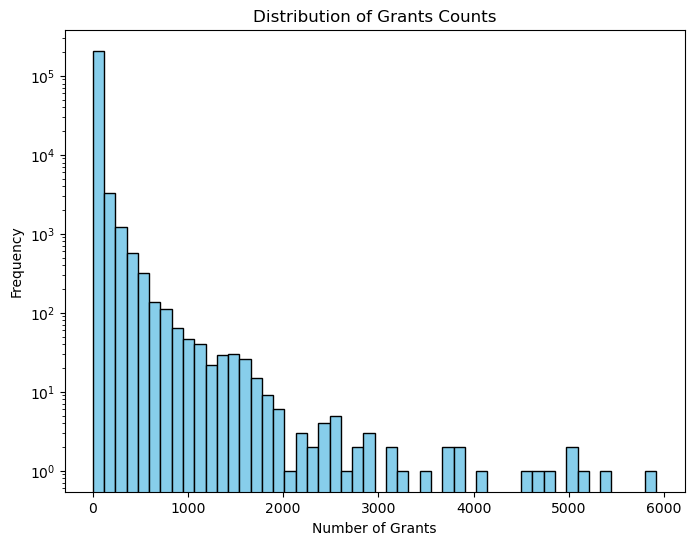

In [56]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Grants')
plt.ylabel('Frequency')
plt.title('Distribution of Grants Counts')
plt.yscale('log')
plt.show()


Filling with 0 again

In [57]:
df_combined['Grants'] = pd.to_numeric(df_combined['Grants'], errors='coerce').fillna(0)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2233350397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Grants'] = pd.to_numeric(df_combined['Grants'], errors='coerce').fillna(0)


Ok 'Grants' is fairly small in comparison to decisions. Let's graph both together to confirm:

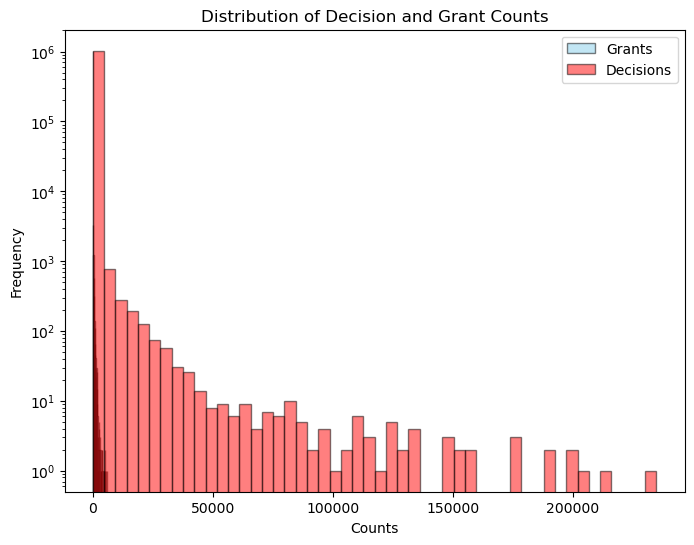

In [58]:
plt.figure(figsize=(8, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision and Grant Counts')
plt.yscale('log')
plt.legend()
plt.show()


OK it is very small. 

Let's investigate if both values are 0 and what the documents look like. Maybe we can clean some more useless rows.

In [59]:
rows_with_zero_grants_and_decisions = df_combined[(df_combined['Grants'] == 0) & (df_combined['Decisions'] == 0)]

In [60]:
rows_with_zero_grants_and_decisions.head()

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
832888,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,At Port,1021.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
832889,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,In Country,896.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
832890,2001,1,Albania,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,At Port,75.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
832891,2001,1,Albania,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,In Country,288.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
832892,2001,1,Algeria,Africa North,NaN,NaN,Unknown,3,NaN,NaN,...,0.0,At Port,57.0,NaN,NaN,NaN,NaN,NaN,NaN,Africa


OK We have to look at 'Applications', we forgot about that. This is probably another useful int column.

In [61]:
df_combined['Applications'].value_counts()

Applications
1.0      80209
2.0      22677
3.0      10785
4.0       6689
5.0       4608
         ...  
507.0        1
431.0        1
542.0        1
471.0        1
562.0        1
Name: count, Length: 755, dtype: int64

Same logic again, let's look at the distribution then fill for 0s

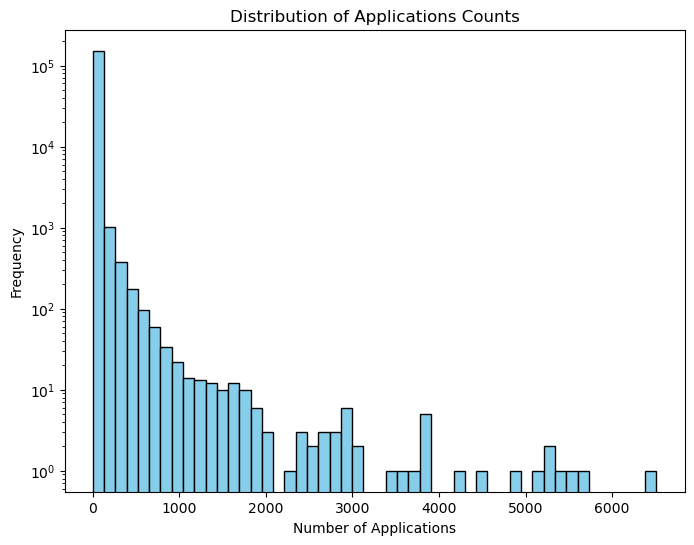

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['Applications'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.title('Distribution of Applications Counts')
plt.yscale('log')
plt.show()

In [63]:
df_combined['Applications'] = pd.to_numeric(df_combined['Applications'], errors='coerce').fillna(0)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\1658246509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Applications'] = pd.to_numeric(df_combined['Applications'], errors='coerce').fillna(0)


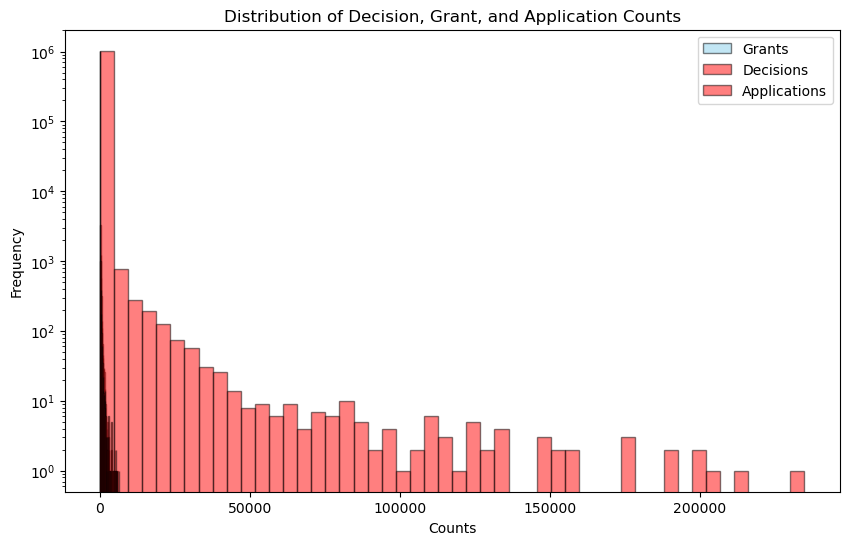

In [64]:
plt.figure(figsize=(10, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')
plt.hist(df_combined['Applications'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Applications')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision, Grant, and Application Counts')
plt.yscale('log')
plt.legend()
plt.show()

Now add together: 'Grants', 'Decisions,' and 'Applications'

In [65]:
rows_with_zero_grants_and_decisions = df_combined[(df_combined['Grants'] == 0) & (df_combined['Decisions'] == 0) & (df_combined['Applications'] == 0)]

In [66]:
rows_with_zero_grants_and_decisions.sample(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
77576,2010,2,Former Yugoslavia,Europe Other,Refused entry at port and subsequently departed,Departed from Juxtaposed controls,30 to 49,2,EU Member State,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
144010,2015,1,Mauritius,Africa Sub-Saharan,Refused entry at port and subsequently departed,Departed from Juxtaposed controls,30 to 49,2,EU Member State,3.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Africa
25933,2006,3,"Gambia, The",Africa Sub-Saharan,Voluntary return,Other verified returns,30 to 49,1,EU Member State,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Africa
150442,2015,3,Iran,Middle East,Enforced return,Enforced removals from detention,18 to 29,1,EU Member State,10.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Middle East
153100,2015,4,Bangladesh,Asia South,Voluntary return,Assisted returns,50 to 69,1,Home country,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia


OK looks to be decent data distribution for now. We can look at some more advanced enginnering later

<div id='Applications'></div>

### Observation x: Applications

Let's check out 'Location of application'

In [67]:
df_combined['Location of application'].value_counts()

Location of application
In Country    48050
At Port       21520
Name: count, dtype: int64

This is not neccesary for anything. Drop.

In [68]:
df_combined.drop(columns=['Location of application'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\3467474852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Location of application'], inplace=True)


Now let's look at 'Application type group'

In [69]:
df_combined['Application type group'].value_counts()

Application type group
Naturalisation    90227
Registration      42204
Name: count, dtype: int64

OK this might not be that useful but lets see if there are any nulls with "issued" in case outcome, maybe we can fill these out a bit

In [70]:
df_combined['Application type group'].value_counts()

Application type group
Naturalisation    90227
Registration      42204
Name: count, dtype: int64

We don't need this. Can drop

In [71]:
df_combined.drop(columns=['Application type group'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2335316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Application type group'], inplace=True)


Let's check out 'Application type'

In [72]:
df_combined['Application type'].value_counts()

Application type
Naturalisation based on residence    51275
Naturalisation based on marriage     34862
Registration of minor children       23387
Registration on other grounds        15074
Name: count, dtype: int64

In [73]:
pd.options.display.max_columns = None

In [74]:
# Filter and display rows where 'Application type' is NaN
df_application_type_na = df_combined[df_combined['Application type'].isna()]

df_application_type_na

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Host Country,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
584636,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Issued,2652.0,Asylum Case,Grant of Other Leave,Total (pre-2006),Asylum case - N/A,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584637,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Temporary Protection,809.0,Asylum Case,Grant of Protection,Total (pre-2006),Asylum case - N/A,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584638,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,15.0,Asylum Case,Refused,Total (pre-2006),Asylum case - N/A,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584639,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,88.0,Asylum Case,Refused,Total (pre-2006),Asylum case - N/A,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
584640,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,609.0,Asylum Case,Refused,Total (pre-2006),Asylum case - N/A,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829063,2022,4,Stateless,Other,NaN,NaN,Unknown,2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Other
829064,2022,4,Stateless,Other,NaN,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Other
829068,2022,4,Stateless,Other,NaN,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Other
829071,2022,4,United States,America North,NaN,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,America


OK we can look at imputations later to fill these out

Let's look into 'Applicant type', not to be confused with Application type!

In [75]:
df_combined['Applicant type'].value_counts()

Applicant type
Main Applicant        243978
All                   127997
Dependant             113117
Resettlement - N/A      3958
Main applicant          2981
Name: count, dtype: int64

<div id='Return_Type'></div>

### Notable Observation x: Return Type

In [76]:
df_combined['Return type'].value_counts()

Return type
Departed from UK Ports               50605
Other verified returns               49411
Controlled returns                   35126
Departed from Juxtaposed controls    26261
Assisted returns                     16244
Enforced removals                    15657
Enforced removals from detention     15639
N/A - pre-2007                       14511
Other returns from detention          4998
Not available                         4285
Non-detained Enforced removals        3728
Non-detained enforced removals        1154
Name: count, dtype: int64

Some of these might be useful later. Let's map together some that are similar, as well as the unknowns, and set the rest to 0.

In [77]:
return_type_mapping = {
    'Verified Returns': [
        'Departed from UK Ports',
        'Other verified returns',
        'Controlled returns',
        'Departed from Juxtaposed controls'
    ],
    'Assisted Returns': [
        'Assisted returns'
    ],
    'Enforced Removals': [
        'Enforced removals',
        'Enforced removals from detention',
        'Non-detained Enforced removals',
        'Non-detained enforced removals'
    ],
    'Other Returns': [
        'Other returns from detention'
        'N/A - pre-2007',
        'Not available'
    ]
}

# Invert the dictionary to map specific outcomes to the broad categories
inverted_return_mapping = {specific: broad for broad, specifics in return_type_mapping.items() for specific in specifics}

# Apply the inverted mapping to the 'Return type' column, filling in unlisted values with their original values
df_combined['Return type'] = df_combined['Return type'].map(inverted_return_mapping).fillna(df_combined['Return type'])

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\4239382008.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Return type'] = df_combined['Return type'].map(inverted_return_mapping).fillna(df_combined['Return type'])


Check

In [78]:
df_combined['Return type'].value_counts()

Return type
Verified Returns                161403
Enforced Removals                36178
Assisted Returns                 16244
N/A - pre-2007                   14511
Other returns from detention      4998
Other Returns                     4285
Name: count, dtype: int64

OK now look at 'Return type group'

In [79]:
df_combined['Return type group'].value_counts()

Return type group
Voluntary return                                   100781
Refused entry at port and subsequently departed     95662
Enforced return                                     41176
Name: count, dtype: int64

Now let's look at 'Return destination group'

In [80]:
df_combined['Return destination group'].value_counts()

Return destination group
Home country       94282
EU Member State    67244
Other country      51952
Home Country       24141
Name: count, dtype: int64

Looks fine. Leave for now

Let's check out 'Number of returns'

In [86]:
df_combined['Number of returns'].value_counts()

Number of returns
1.0      123647
2.0       40135
3.0       19840
4.0       11592
5.0        7827
          ...  
303.0         1
355.0         1
199.0         1
205.0         1
346.0         1
Name: count, Length: 326, dtype: int64

Let's look at the distribution

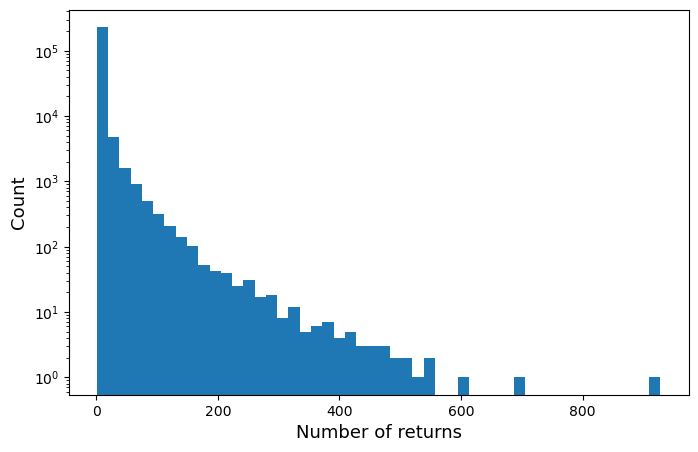

In [82]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Number of returns'], bins = 50 )
plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Number of returns", size=13)
plt.show()

<div id='Host_Country'></div>

### Observation x: Host Country

OK now let's look at 'Host Country'

In [87]:
df_combined['Host Country'].value_counts()

KeyError: 'Host Country'

Lets drop this. No value, we have all this in 'Nationality'

In [84]:
df_combined.drop(columns=['Host Country'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\4251357513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Host Country'], inplace=True)


<div id='Industry_Jobs'></div>

### Observation x: Industry and Jobs

Now let's look at Industry and Jobs

In [88]:
df_combined['Industry'].value_counts()

Industry
Professional, Scientific and Technical Activities                                        29404
Education                                                                                15969
Financial and Insurance Activities                                                       15438
Information and Communications                                                           14861
Human Health and Social Work Activities                                                  14834
Manufacturing                                                                            14553
Arts, Entertainment and Recreation                                                       12722
Administrative and Support Service Activities                                             7886
Wholesale and retail trade; repair of motor vehicles and motorcycles                      6984
Other Service Activities                                                                  6589
Construction                             

In [89]:
# Convert 'Industry' column to lowercase
df_combined['Industry'] = df_combined['Industry'].str.lower()

# Then get the value counts
industry_value_counts = df_combined['Industry'].value_counts()

# Display the value counts
print(industry_value_counts)


Industry
professional, scientific and technical activities                                        29404
education                                                                                15969
financial and insurance activities                                                       15438
information and communications                                                           14861
human health and social work activities                                                  14834
manufacturing                                                                            14553
arts, entertainment and recreation                                                       12722
administrative and support service activities                                             7886
wholesale and retail trade; repair of motor vehicles and motorcycles                      6984
other service activities                                                                  6589
construction                             

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\3080161041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Industry'] = df_combined['Industry'].str.lower()


Let's look at occupation

In [ ]:
df_combined['Occupation'].value_counts()

OK let's make lowercase as well

In [90]:
df_combined['Occupation'] = df_combined['Occupation'].str.lower()
occupation_value_counts = df_combined['Occupation'].value_counts()

print(occupation_value_counts)


Occupation
2136 - programmers and software development professionals        7687
2423 - management consultants and business analysts              6657
3545 - sales accounts and business development managers          5369
3534 - finance and investment analysts and advisers              4369
2135 - it business analysts, architects and systems designers    4314
                                                                 ... 
9239 - elementary cleaning occupations n.e.c.                       2
2441 - public service administrative professionals                  2
6215 - rail travel assistants                                       2
9259 - elementary sales occupations n.e.c.                          1
9231 - window cleaners                                              1
Name: count, Length: 324, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_13804\2050417035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occupation'] = df_combined['Occupation'].str.lower()


Now 'Occ. sub-major group'

In [91]:
df_combined['Occ. sub-major group'].value_counts()

Occ. sub-major group
Science, Research, Engineering and Technology Professionals    40457
Business, Media and Public Service Professionals               28835
Business and Public Service Associate Professionals            25163
Corporate Managers and Directors                               18727
Culture, Media and Sports Occupations                          10802
Health Professionals                                           10401
Caring Personal Service Occupations                             5128
Textiles, Printing and Other Skilled Trades                     3610
Science, Engineering and Technology Associate Professionals     3361
Teaching and Educational Professionals                          3316
Health and Social Care Associate Professionals                  2524
Other Managers and Proprietors                                  2429
Administrative Occupations                                      2328
Skilled Metal, Electrical and Electronic Trades                 2324
Skilled Agric

In [92]:
df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].str.lower()
sub_occ_value_counts = df_combined['Occ. sub-major group'].value_counts()

print(sub_occ_value_counts)


Occ. sub-major group
science, research, engineering and technology professionals    40457
business, media and public service professionals               28835
business and public service associate professionals            25163
corporate managers and directors                               18727
culture, media and sports occupations                          10802
health professionals                                           10401
caring personal service occupations                             5128
textiles, printing and other skilled trades                     3610
science, engineering and technology associate professionals     3361
teaching and educational professionals                          3316
health and social care associate professionals                  2524
other managers and proprietors                                  2429
administrative occupations                                      2328
skilled metal, electrical and electronic trades                 2324
skilled agric

C:\Users\patri\AppData\Local\Temp\ipykernel_13804\3576095022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. sub-major group'] = df_combined['Occ. sub-major group'].str.lower()


Same for minor

In [93]:
df_combined['Occ. minor group'].value_counts()

Occ. minor group
Information Technology and Telecommunications Professionals    18119
Business, Research and Administrative Professionals            15446
Engineering Professionals                                      13446
Sales, Marketing and Related Associate Professionals           11575
Business, Finance and Related Associate Professionals          10667
                                                               ...  
Conservation Associate Professionals                               2
Therapists                                                         2
Protective Service Officers                                        2
Business and Statistical Professionals                             2
Elementary Sales Occupations                                       1
Name: count, Length: 97, dtype: int64

In [95]:
df_combined['Occ. minor group'] = df_combined['Occ. minor group'].str.lower()
occ_minor_value_counts = df_combined['Occ. minor group'].value_counts()

print(occ_minor_value_counts)

Occ. minor group
information technology and telecommunications professionals    18119
business, research and administrative professionals            15446
engineering professionals                                      13446
sales, marketing and related associate professionals           11575
business, finance and related associate professionals          10667
                                                               ...  
conservation associate professionals                               2
therapists                                                         2
protective service officers                                        2
business and statistical professionals                             2
elementary sales occupations                                       1
Name: count, Length: 97, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_13804\1906950345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. minor group'] = df_combined['Occ. minor group'].str.lower()


And unit group

In [96]:
df_combined['Occ. unit group'].value_counts()

Occ. unit group
Programmers and software development professionals        7687
Management consultants and business analysts              6657
Sales accounts and business development managers          5369
Finance and investment analysts and advisers              4369
IT business analysts, architects and systems designers    4314
                                                          ... 
Management accountants                                       2
Security managers                                            2
Rail travel assistants                                       2
Window cleaners                                              1
Elementary sales occupations n.e.c.                          1
Name: count, Length: 320, dtype: int64

These jobs seem more specific. Let's lowercase as well

In [97]:
df_combined['Occ. unit group'] = df_combined['Occ. unit group'].str.lower()
occ_unit_counts = df_combined['Occ. unit group'].value_counts()

print(occ_unit_counts)

Occ. unit group
programmers and software development professionals        7687
management consultants and business analysts              6657
sales accounts and business development managers          5369
finance and investment analysts and advisers              4369
it business analysts, architects and systems designers    4314
                                                          ... 
management accountants                                       2
security managers                                            2
rail travel assistants                                       2
window cleaners                                              1
elementary sales occupations n.e.c.                          1
Name: count, Length: 320, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_13804\417555828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. unit group'] = df_combined['Occ. unit group'].str.lower()


Last one to get is occ. major, let's lowercase as well

In [99]:
df_combined['Occ. major group'].value_counts()

Occ. major group
Professional Occupations                            83017
Associate Professional and Technical Occupations    41974
Managers, Directors and Senior Officials            21156
Skilled Trades Occupations                           8263
Caring, Leisure and Other Service Occupations        5860
Administrative and Secretarial Occupations           3141
Elementary Occupations                               1434
Sales and Customer Service Occupations               1102
Process, Plant and Machine Operatives                 389
Personal Service Occupations                           10
Managers and Senior Officials                           6
Name: count, dtype: int64

In [100]:
df_combined['Occ. major group'] = df_combined['Occ. major group'].str.lower()
occ_unit_counts = df_combined['Occ. major group'].value_counts()

print(occ_unit_counts)

Occ. major group
professional occupations                            83017
associate professional and technical occupations    41974
managers, directors and senior officials            21156
skilled trades occupations                           8263
caring, leisure and other service occupations        5860
administrative and secretarial occupations           3141
elementary occupations                               1434
sales and customer service occupations               1102
process, plant and machine operatives                 389
personal service occupations                           10
managers and senior officials                           6
Name: count, dtype: int64


C:\Users\patri\AppData\Local\Temp\ipykernel_13804\4230446895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Occ. major group'] = df_combined['Occ. major group'].str.lower()


OK we can move on from this book. Saving as df_combined_EDA1.csv

We will continue in book 2

In [104]:
df_combined.to_csv('C:/Users/patri/Downloads/df_combined_EDA1.csv', index=False)